In [330]:
'''
Portfolios performance Analysis
By Ying Fu
'''

'\nPortfolios performance Analysis\nBy Ying Fu\n'

 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [331]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [332]:
# Reading whale returns
whale_returns_path =Path('./Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_returns_path,index_col='Date', parse_dates=True,infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [333]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [334]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [335]:
# Reading algorithmic returns
algo_returns_path =Path('./Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_returns_path,index_col='Date',parse_dates=True,infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [336]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [337]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [338]:
# Reading S&P 500 Closing Prices
sp500_history_path =Path('./Resources/sp500_history.csv')
sp500_history = pd.read_csv(sp500_history_path,index_col='Date',parse_dates=True,infer_datetime_format=True)
sp500_history.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [339]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [340]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','').astype('float')
sp500_history['Close']

C:\Users\yingf\AppData\Local\Temp/ipykernel_15736/2068904255.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$','').astype('float')


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [341]:
# Calculate Daily Returns
sp500_history = sp500_history.sort_index()
sp500_history_daily_return = sp500_history.pct_change()
sp500_history_daily_return

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [342]:
# Drop nulls
sp500_history_daily_return = sp500_history_daily_return.dropna()
sp500_history_daily_return.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [343]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_daily_return.columns = ["S&P500"]
sp500_history_daily_return.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [344]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns,algo_returns,sp500_history_daily_return],axis='columns',join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Wale, Algorithmic and S&P 500 Daily Returns'}, xlabel='Date'>

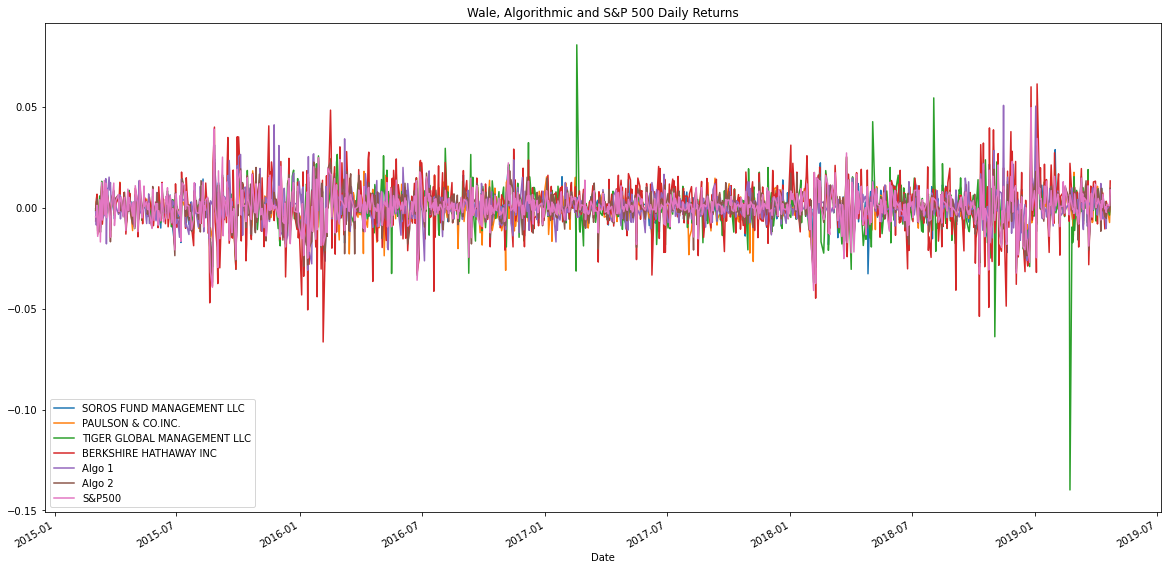

In [345]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10),title='Wale, Algorithmic and S&P 500 Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Wale, Algorithmic and S&P 500 cumulative Returns'}, xlabel='Date'>

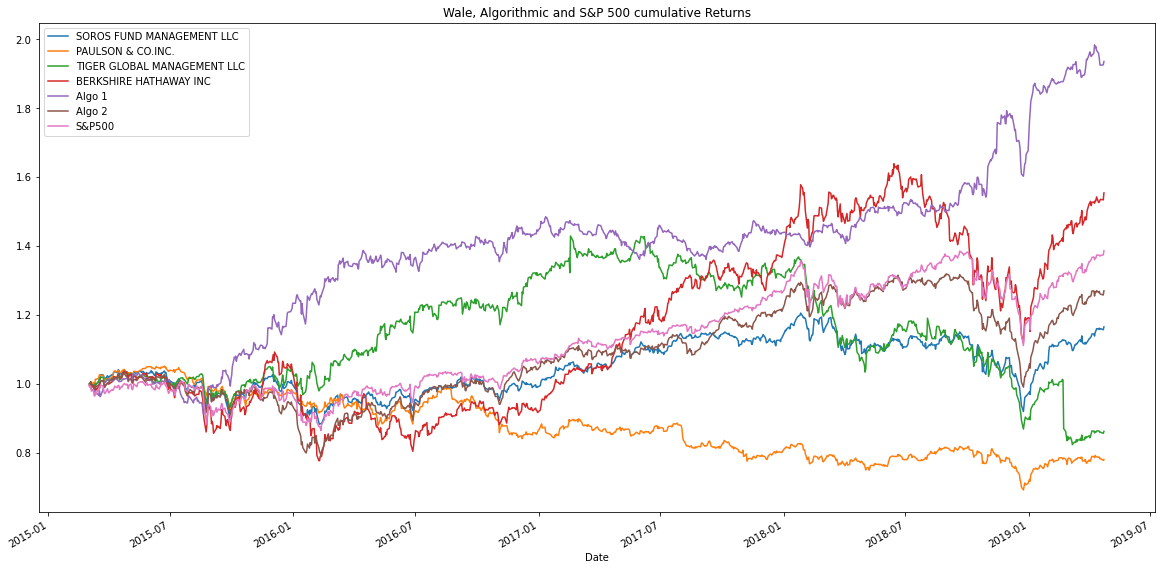

In [346]:
# Calculate cumulative returns of all portfolios
combined_returns_cum = (1+combined_returns).cumprod()
# Plot cumulative returns
combined_returns_cum.plot(figsize=(20,10),title = 'Wale, Algorithmic and S&P 500 cumulative Returns')

Based on the cumulative returns, we can see from the picture that Algo 1 started outperformed the S&P 500 from the end of 2015 and far above in the early 2019.  Berkshire Hathaway Inc also outperformed the S&P 500 after the middle of 2017. The other portfolios underperformed the S&P 500, especially Paulson & Co.Inc and Tiger Global Management LLC, they had a loss during the period of March 2015 to Apri 2019. 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Wale, Algorithmic and S&P 500 risk'}>

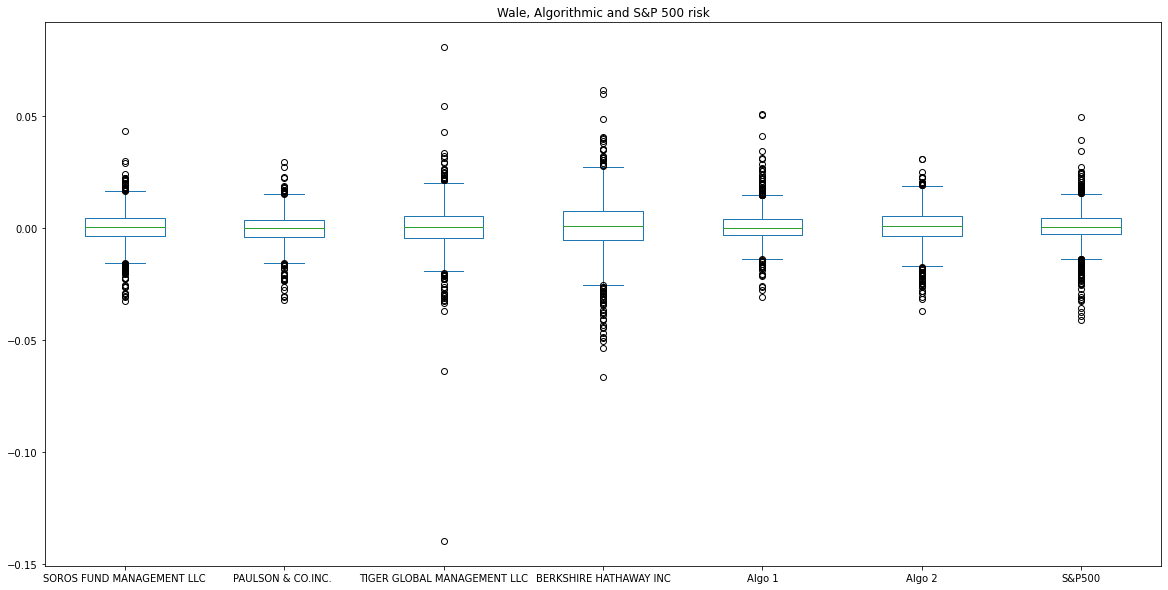

In [347]:
# Box plot to visually show risk
combined_returns.plot(kind = 'box', figsize=(20,10),title ='Wale, Algorithmic and S&P 500 risk')

Berkshire Hathaway Inc has a largest spread (has more risk).The second risk portfolio is Tiger Global Mangement. Tiger Global Mangement LLC also has the largest outliers.

### Calculate Standard Deviations

In [348]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [349]:
# Calculate  the daily standard deviation of S&P 500
combined_returns_std['S&P500']
# Determine which portfolios are riskier than the S&P 500
sorted_combined_returns_std = combined_returns_std.sort_values(ascending=False)
riskier_portfolios = sorted_combined_returns_std[:'S&P500'].iloc[:-1]
riskier_portfolios


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
dtype: float64

### Calculate the Annualized Standard Deviation

In [350]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling std'}, xlabel='Date'>

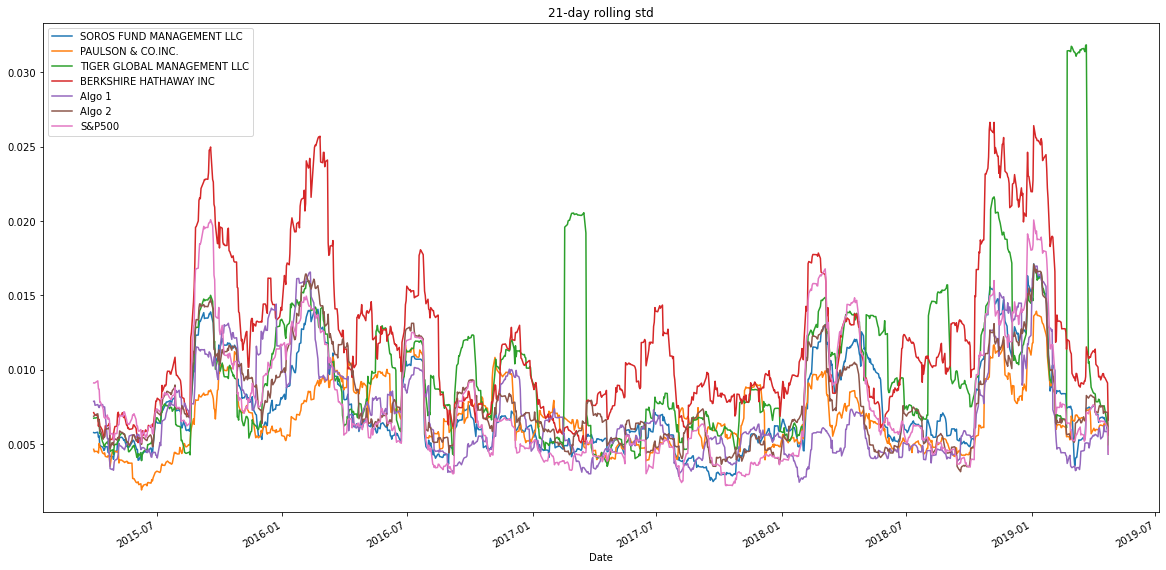

In [351]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_returns_rolling_std.plot(figsize = (20,10),title ='21-day rolling std')

Based on the 21-Day rolling standard deviations, Tiger Global Mangement LLC and Berkshire Hathaway Inc are riskier than the other portfolios. 

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


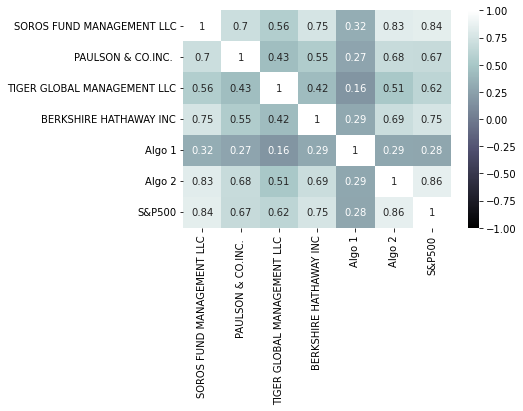

In [352]:
# Calculate the correlation
combined_returns_corr = combined_returns.corr()
combined_returns_corr
# Display de correlation matrix
sns.heatmap(combined_returns_corr, vmin=-1, vmax=1, annot=True,  cmap="bone")
combined_returns_corr

Algo 2 mimick the S&P 500 mostly with 86% correlation. Soros Fund Management LLC is the second mostly mimick the S&P 500 with 84% correlation. 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Algo 1 60-day Rolling Beta '}, xlabel='Date'>

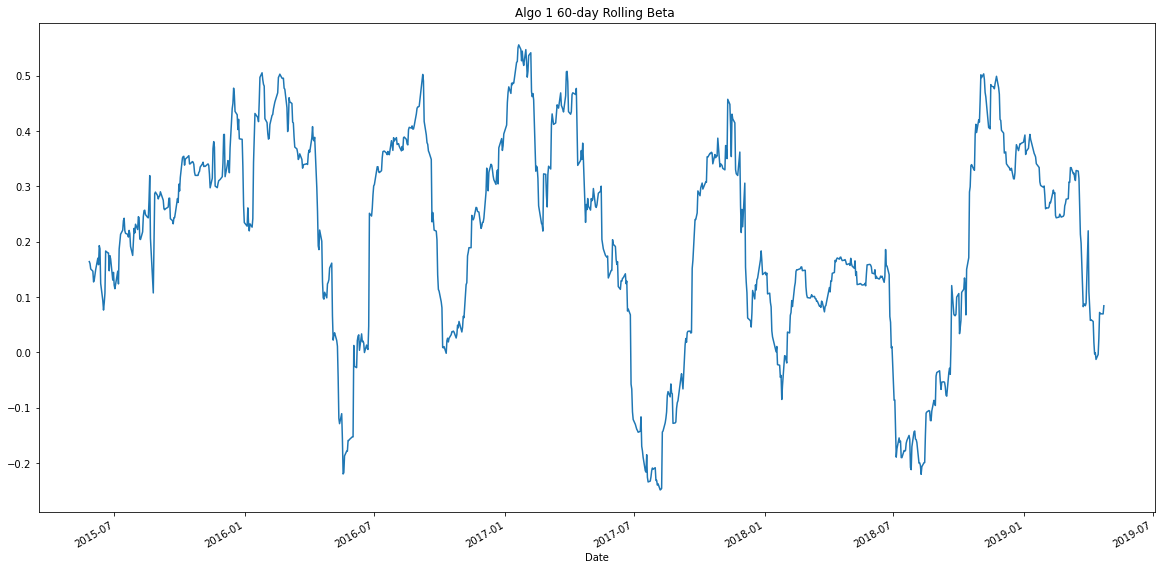

In [353]:
# Calculate covariance of a single portfolio
#60-day rolling covariance
algo1_rolling_60_cov = combined_returns['Algo 1'].rolling(window =60).cov(combined_returns['S&P500'])
algo1_rolling_60_cov
# Calculate variance of S&P 500
#60-day rolling variance
sp500_rolling_60_var= combined_returns['S&P500'].rolling(window=60).var()
sp500_rolling_60_var
# Computing beta
#60-day rolling beta
algo1_rolling_60_beta =algo1_rolling_60_cov/sp500_rolling_60_var
algo1_rolling_60_beta
# Plot beta trend
#60-day rolling beta
algo1_rolling_60_beta.plot(figsize =(20,10), title ='Algo 1 60-day Rolling Beta ')


Algo 1 is less volatile than the market because the 60-day rolling beta is less than 1, and may go oposite of the direction of market when beta is less than 0. 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [354]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm_std = combined_returns.ewm (halflife=21).std()
combined_returns_ewm_std


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [355]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean()*252)/(combined_returns_std * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

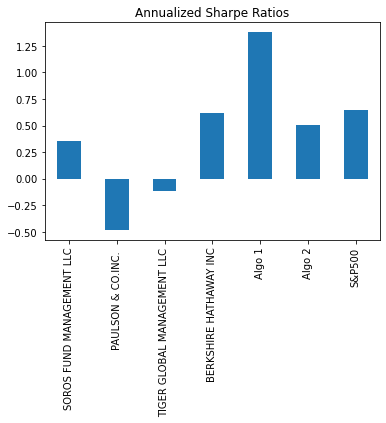

In [356]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar',title='Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on th Sharpe Ratios, Algo 1 outperformed both the market (S&P 500) and all the whales portfolios. Algo 2 outperformed SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC, but underperformed the market(S&P 500) and BERKSHIRE HATHAWAY INC.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [357]:
# Reading data from 1st stock
# Amazon daily stock prices from 4-18-2018 to 4-17-2019
amzn_price = pd.read_csv('./Resources/amzn_price.csv',index_col= 'Date', parse_dates=True,infer_datetime_format=True)
amzn_price.head()

,Close
Date,
2018-04-18 16:00:00,1527.84
2018-04-19 16:00:00,1556.91
2018-04-20 16:00:00,1527.49
2018-04-23 16:00:00,1517.86
2018-04-24 16:00:00,1460.09


In [358]:
# Reading data from 2nd stock
# Facebook daily stock prices from 4-18-2018 to 4-17-2019
fb_price = pd.read_csv('./Resources/amzn_price.csv', index_col= 'Date', parse_dates=True,infer_datetime_format=True)
fb_price.head()

,Close
Date,
2018-04-18 16:00:00,1527.84
2018-04-19 16:00:00,1556.91
2018-04-20 16:00:00,1527.49
2018-04-23 16:00:00,1517.86
2018-04-24 16:00:00,1460.09


In [359]:
# Reading data from 3rd stock
# Microsoft daily stock prices from 4-18-2018 to 4-17-2019
msft_price = pd.read_csv('./Resources/msft_price.csv',index_col='Date', parse_dates=True,infer_datetime_format=True)
msft_price.head()

,Close
Date,
2018-04-18 16:00:00,96.44
2018-04-19 16:00:00,96.11
2018-04-20 16:00:00,95.00
2018-04-23 16:00:00,95.35
2018-04-24 16:00:00,93.12


In [360]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([amzn_price,fb_price,msft_price], axis='columns', join ='inner')
my_portfolio

,Close,Close,Close
Date,,,
2018-04-18 16:00:00,1527.84,1527.84,96.44
2018-04-19 16:00:00,1556.91,1556.91,96.11
2018-04-20 16:00:00,1527.49,1527.49,95.00
2018-04-23 16:00:00,1517.86,1517.86,95.35
2018-04-24 16:00:00,1460.09,1460.09,93.12
...,...,...,...
2019-04-11 16:00:00,1844.07,1844.07,120.33
2019-04-12 16:00:00,1843.06,1843.06,120.95
2019-04-15 16:00:00,1844.87,1844.87,121.05


In [361]:
# Reset Date index
my_portfolio = my_portfolio.reset_index('Date')
my_portfolio['Date'] = pd.to_datetime(my_portfolio['Date']).dt.date
my_portfolio = my_portfolio.set_index('Date')

In [362]:
# Reorganize portfolio data by having a column per symbol
my_portfolio.columns =['AMZN', 'FB', 'MSFT']
my_portfolio.head()

,AMZN,FB,MSFT
Date,,,
2018-04-18,1527.84,1527.84,96.44
2018-04-19,1556.91,1556.91,96.11
2018-04-20,1527.49,1527.49,95.00
2018-04-23,1517.86,1517.86,95.35
2018-04-24,1460.09,1460.09,93.12


In [363]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio.pct_change()
my_portfolio_daily_returns
# Drop NAs
my_portfolio_daily_returns = my_portfolio_daily_returns.dropna()
# Display sample data
my_portfolio_daily_returns.head()

,AMZN,FB,MSFT
Date,,,
2018-04-19,0.019027,0.019027,-0.003422
2018-04-20,-0.018896,-0.018896,-0.011549
2018-04-23,-0.006304,-0.006304,0.003684
2018-04-24,-0.038060,-0.038060,-0.023388
2018-04-25,0.000055,0.000055,-0.008698


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [364]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_weighted_returns= my_portfolio_daily_returns.dot(weights)
# add column name
my_weighted_returns =pd.concat([my_weighted_returns, my_portfolio_daily_returns], axis ="columns",join = 'inner')
my_weighted_returns =my_weighted_returns.rename(columns = {0:"my_portfolio"})

# Display sample data
my_weighted_returns.head()

,my_portfolio,AMZN,FB,MSFT
Date,,,,
2018-04-19,0.011544,0.019027,0.019027,-0.003422
2018-04-20,-0.016447,-0.018896,-0.018896,-0.011549
2018-04-23,-0.002975,-0.006304,-0.006304,0.003684
2018-04-24,-0.033169,-0.038060,-0.038060,-0.023388
2018-04-25,-0.002863,0.000055,0.000055,-0.008698


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [365]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_returns = pd.concat([my_weighted_returns['my_portfolio'],combined_returns],axis = 'columns',join = 'inner')
new_combined_returns.head()

C:\Users\yingf\anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)
C:\Users\yingf\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:483: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return lib.array_equivalent_object(


,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-04-19 00:00:00,0.011544,-0.008606,-0.005944,-0.012693,-0.000306,0.006710,-0.005309,-0.005726
2018-04-20 00:00:00,-0.016447,-0.007810,-0.004990,-0.018703,-0.008744,0.002837,-0.004502,-0.008537
2018-04-23 00:00:00,-0.002975,0.002767,-0.000789,-0.008146,-0.005842,0.005675,-0.003902,0.000056
2018-04-24 00:00:00,-0.033169,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381
2018-04-25 00:00:00,-0.002863,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837


In [366]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_combined_returns.dropna()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2018-04-19,0.011544,-0.008606,-0.005944,-0.012693,-0.000306,0.006710,-0.005309,-0.005726
2018-04-20,-0.016447,-0.007810,-0.004990,-0.018703,-0.008744,0.002837,-0.004502,-0.008537
2018-04-23,-0.002975,0.002767,-0.000789,-0.008146,-0.005842,0.005675,-0.003902,0.000056
2018-04-24,-0.033169,-0.010467,-0.002791,-0.015645,-0.011289,0.004873,-0.006742,-0.013381
2018-04-25,-0.002863,-0.000199,-0.002036,0.003021,-0.009720,-0.000113,-0.001679,0.001837
...,...,...,...,...,...,...,...,...
2019-04-11,-0.000788,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,0.000038
2019-04-12,0.001352,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.006609
2019-04-15,0.000930,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [367]:
# Calculate the annualized `std`
new_combined_returns_std = new_combined_returns.std()
new_combined_returns_annualized_std = new_combined_returns_std*np.sqrt(252)
new_combined_returns_annualized_std.sort_values()

PAULSON & CO.INC.              0.116697
Algo 1                         0.130872
Algo 2                         0.136650
SOROS FUND MANAGEMENT LLC      0.149019
S&P500                         0.150479
TIGER GLOBAL MANAGEMENT LLC    0.233693
BERKSHIRE HATHAWAY INC         0.241723
my_portfolio                   0.304972
dtype: float64

My portfolio has the most standared deviation,that means it is riskiest.

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'New combined portfolios 21-Day Rolling Standard Deviations'}, xlabel='Date'>

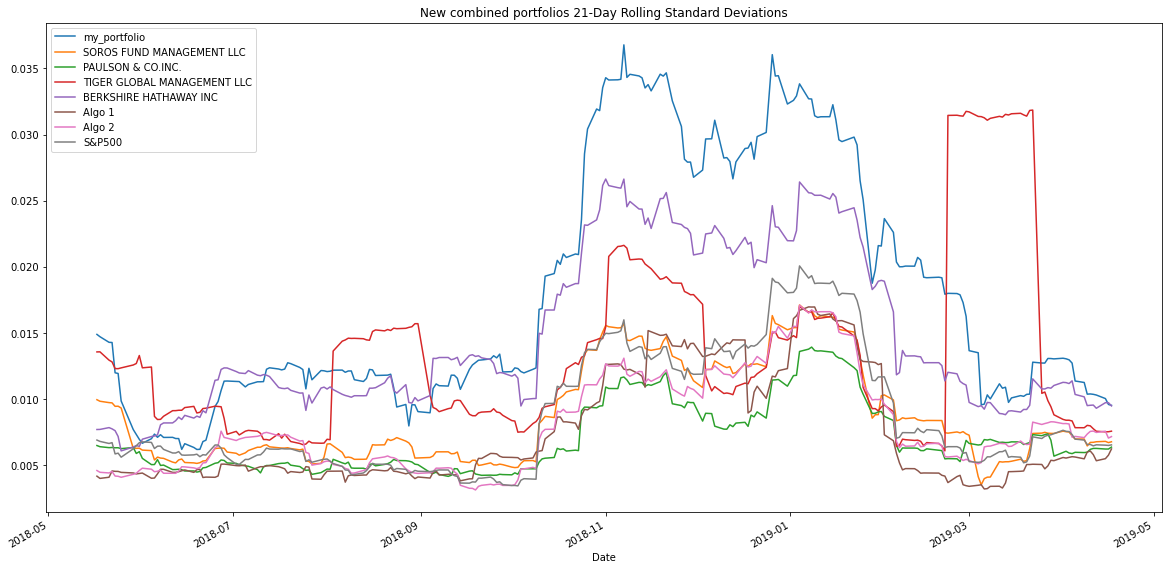

In [368]:
# Calculate rolling standard deviation
new_combined_returns_rolling_std = new_combined_returns.rolling(window = 21).std()
# Plot rolling standard deviation
new_combined_returns_rolling_std.plot(figsize = (20,10), title = 'New combined portfolios 21-Day Rolling Standard Deviations')

The 21-day rolling standard deviation of my portfolio is on the peak during the end of 2018 and the begining of 2019, and goes down after Feb. 2019. It was the highest among those of the other portfolios during most of the time from Apr. 2018 -Apr. 2019, except for Mar.2019. Tiger Global Management LLC have a huge spike in March 2019. 

### Calculate and plot the correlation

<AxesSubplot:>

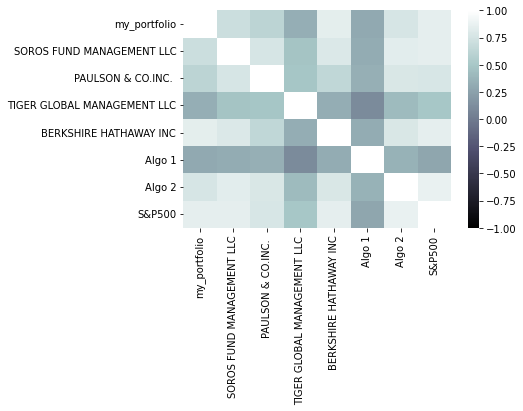

In [369]:
# Calculate and plot the correlation
new_combined_returns_corr = new_combined_returns.corr()
new_combined_returns_corr
sns.heatmap(new_combined_returns_corr,vmin =-1, vmax= 1, cmap='bone')

My portfolio has a strongest correlation with S&P 500 at 84% and weakest correlation with Algo 1 at 30%.

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'My portfolio 60-Day Rolling Beta'}, xlabel='Date'>

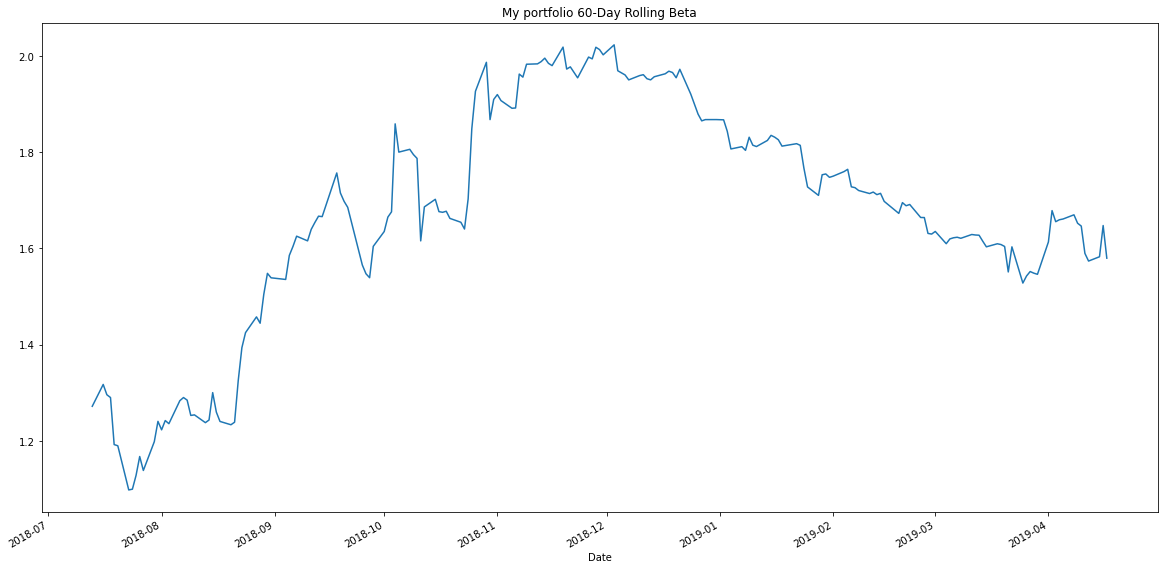

In [370]:
# Calculate and plot Beta
cov_rolling60 = new_combined_returns['my_portfolio'].rolling(window = 60).cov(new_combined_returns['S&P500'])
var_rolling60 = new_combined_returns['S&P500'].rolling(window = 60).var()
beta_rolling60 = cov_rolling60/var_rolling60
beta_rolling60.plot(figsize=(20,10),title = 'My portfolio 60-Day Rolling Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [371]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (new_combined_returns.mean()*252)/(new_combined_returns_std * np.sqrt(252))
new_sharpe_ratios.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.046467
Algo 2                         0.014185
PAULSON & CO.INC.              0.035356
BERKSHIRE HATHAWAY INC         0.101802
SOROS FUND MANAGEMENT LLC      0.157270
S&P500                         0.531501
my_portfolio                   0.861874
Algo 1                         2.222913
dtype: float64

<AxesSubplot:title={'center':'New Combined Portfolios Annualized Sharpe Ratios'}>

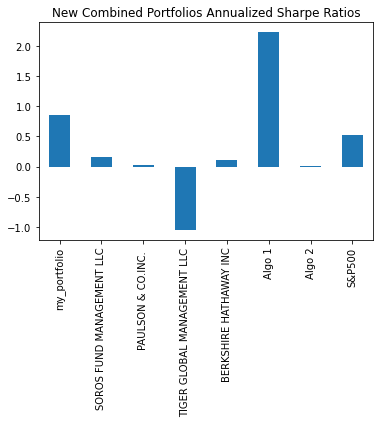

In [372]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind='bar', title = 'New Combined Portfolios Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My fortfolio outperformed the market(S&P 500), Algo 2 and all the whale portfolios, only underperformed Algo 1.